## Introduction to Canal Transit endpoint

This notebook will give a tutorial on how to query canal transit data through pythonSDK.


*This endpoint requires a subscription to Canal Transit API. Do note that this endpoint covers non-energy tanker as well.*

## Import Libraries

In [1]:
import vortexasdk as v
import pandas as pd
from datetime import datetime
import plotly.express as px
import numpy as np

c:\Users\OuiWeinJien\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Canal Transit endpoint

Here we will take panama canal as example.

In [2]:
df = v.CanalTransit().search(
    filter_canal = 'panama_canal'
).to_df()

2024-09-17 14:13:43,075 vortexasdk.client — WARNING — You are using vortexasdk version 0.73.0, however version 0.73.1 is available.
You should consider upgrading via the 'pip install vortexasdk --upgrade' command.


In [3]:
df

,vessel_id,vessel_name,vessel_imo,vessel_class.0.label,vessel_cubic_capacity,vessel_dead_weight,booked,canal,direction,lock,queue_arrival_time,canal_entry_time,cargoes.0.product.label,cargoes.0.quantity_barrels,cargoes.0.quantity_tonnes,cargoes.0.quantity_cubic_metres,origin.0.label,destination.0.label
0,a6badd38ac3419c86613197ae345faf1262a509c4e4c9b...,TORM HELVIG,9288021.0,Oil Tankers,53599.0,46187.0,,panama_canal,southbound,panamax,2024-05-07T06:00:00.000Z,2024-05-08T03:30:00.000Z,,,,,,Vietnam
1,9c4f2a094451b6f4141dce5f37dd37f8d747d98ffddb52...,HAI SHANG,9792852.0,Oil Tankers,122290.0,109898.0,,panama_canal,northbound,neo_panamax,2024-08-26T10:10:00.000Z,2024-08-27T05:47:00.000Z,,388421.0,60519.0,61754.0,PLZ [US],Seaway Freeport Terminal
2,,dry_bulk_carrier_00d4110edda6ecb9,,non_energy_vessels,,,,panama_canal,northbound,panamax,2024-06-06T14:45:00.000Z,2024-06-10T07:15:00.000Z,,,,,,
3,,general_cargo_0126b5615b6262c7,,non_energy_vessels,,,,panama_canal,northbound,panamax,2024-07-14T17:00:00.000Z,2024-07-15T19:25:00.000Z,,,,,,
4,59637155315f13349478117cae441722502b37ea63d166...,SEA NAVIGATOR,9724594.0,Oil Tankers,53838.0,45999.0,,panama_canal,southbound,panamax,2024-09-06T23:00:00.000Z,2024-09-07T03:30:00.000Z,,154755.0,20790.0,24604.0,ExxonMobil Baytown Refinery,Chile (South America West Coast) 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,dc6e85375f7ee81e7b390c3013121fb7b3d7e5aff25958...,SILVER ETREMA,9718430.0,Oil Tankers,53161.0,49668.0,,panama_canal,northbound,panamax,2024-09-05T08:00:00.000Z,2024-09-06T02:41:00.000Z,,,,,Depositos Quimicos Mineros - Consorcio Termina...,Marathon Galveston Bay (Ex-Bp - Amoco)
1016,,dry_bulk_carrier_ff8ccb614a03b9d7,,non_energy_vessels,,,,panama_canal,northbound,panamax,2024-07-20T10:30:00.000Z,2024-07-22T05:30:00.000Z,,,,,,
1017,45ee9a309d10623dec8f3944cbf20ca6c9a5ecffb8dca8...,PACIFIC BINZHOU,9743734.0,LPG Carriers,82478.0,54747.0,,panama_canal,southbound,neo_panamax,2024-06-08T10:20:00.000Z,2024-06-10T07:15:00.000Z,,351163.0,27396.0,47235.0,Energy Transfer Nederland,Toa Jxe
1018,e835210dfe91544b4a05548be8a2e2d10fad35e372d07b...,ENABLE,9900851.0,LPG Carriers,21560.0,16935.0,,panama_canal,northbound,panamax,2024-06-05T22:36:00.000Z,2024-06-08T19:57:00.000Z,,98699.0,5407.0,9911.0,Meifu Petrochemical Zhapu Jiaxing,Enterprise Morgans Point


## Canal Transit Timeseries endpoint

In [8]:
timeseries_df = v.CanalTransitTimeseries().search(
    filter_canal = 'panama_canal',
    filter_voyage_status='laden',
    time_min = datetime(2024,1,1),
    time_max= datetime(2024,8,31),
    timeseries_activity = 'started_transiting',
    timeseries_frequency='week',
    metric='count_of_vessels'
).to_df()

In [9]:
timeseries_df.head()

,key,count,value
0,2024-01-01 00:00:00+00:00,31,31
1,2024-01-08 00:00:00+00:00,33,33
2,2024-01-15 00:00:00+00:00,27,27
3,2024-01-22 00:00:00+00:00,20,20
4,2024-01-29 00:00:00+00:00,37,37


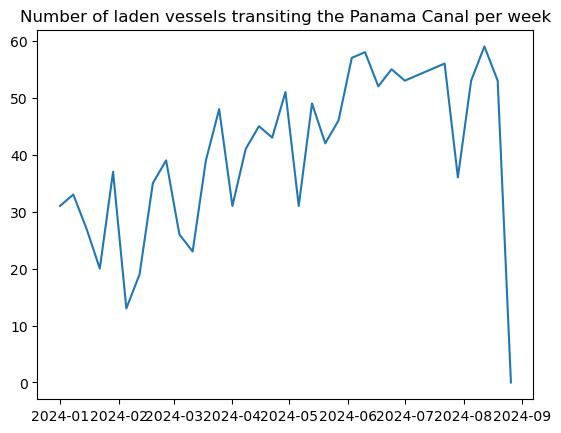

In [11]:
import matplotlib.pyplot as plt

plt.plot(timeseries_df['key'], timeseries_df['count'])
plt.title('Number of laden vessels transiting the Panama Canal per week')
plt.show()